In [17]:
!sudo apt-get install -y fonts-nanum # 한글로 바꾸는 것을 설치하는 코딩이다. 지금 실행이 잘 안되서 혹시 다른 컴퓨터에는 작동이 잘 될지를 몰라서 넣어 보았다. 
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,055 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
DF= pd.read_csv("최영준_심박수(수).csv")
DF1=DF[:829]
DF=DF1[['time','heartrate']]

In [2]:
DF.reset_index()
DF.columns=['ds','y']
train=DF[:819]
test=DF[819:]
prophet=Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=True,
                changepoint_prior_scale=0.4)
prophet.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [3]:
future=prophet.make_future_dataframe(periods=30,freq='d')
forecast_data=prophet.predict(future)
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
843,2021-11-25 21:00:00,-76.664691,-662.800230,526.717962
844,2021-11-26 21:00:00,-56.590459,-500.281571,403.721844
845,2021-11-27 21:00:00,-53.475198,-486.566124,391.663885
846,2021-11-28 21:00:00,-27.225551,-251.811393,202.805476
847,2021-11-29 21:00:00,-3.747150,-40.445875,33.193958


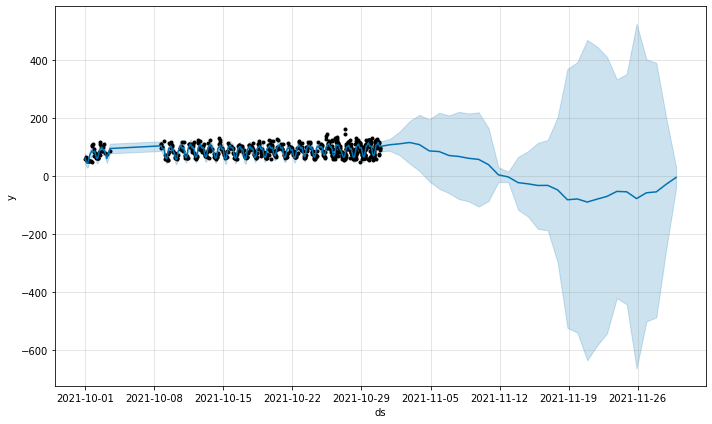

In [4]:
fig=prophet.plot(forecast_data)

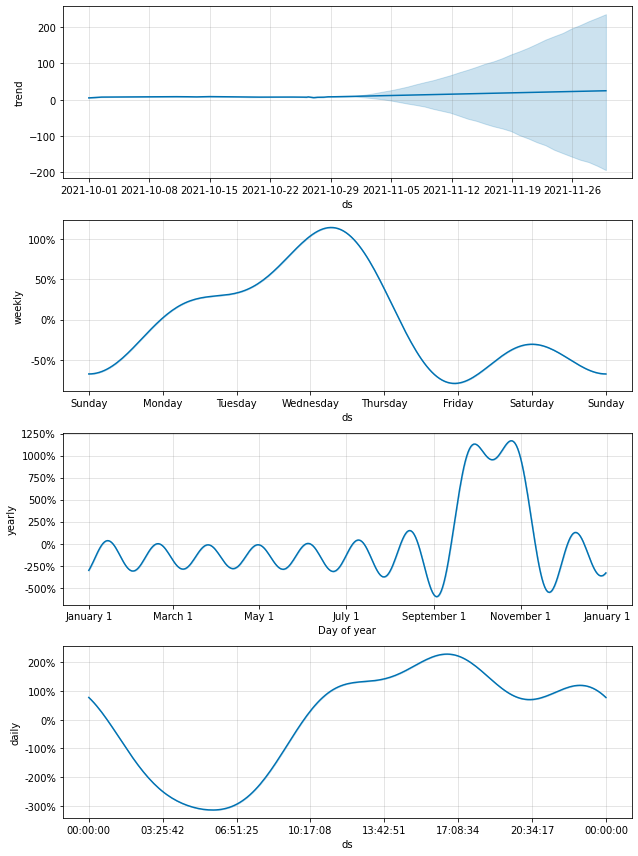

In [5]:
fig2=prophet.plot_components(forecast_data)

In [6]:
test= test.drop('ds',axis=1)
test

,y
819,50.0
820,65.0
821,60.0
822,51.0
823,44.0
824,53.0
825,66.0
826,52.0
827,63.0
828,70.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



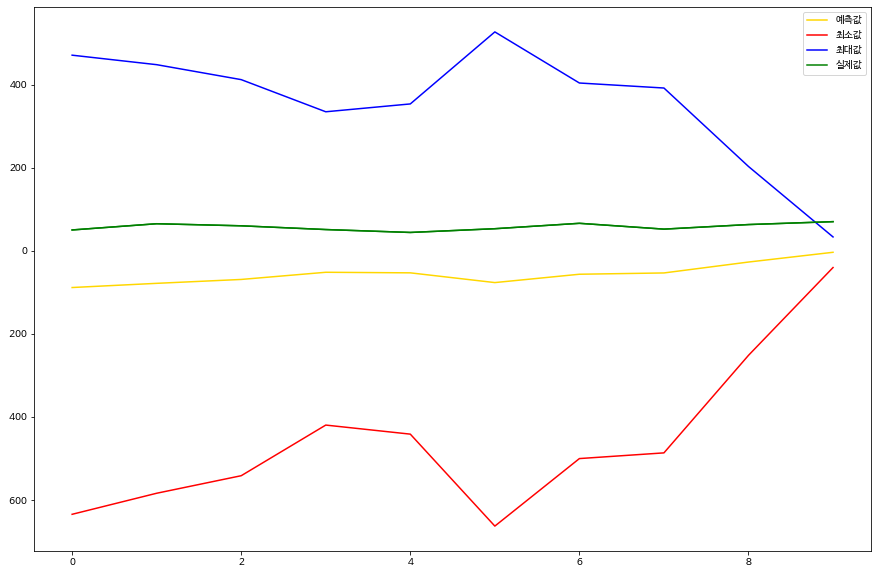

In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(15,10))
pred_fbprophet=forecast_data.yhat.values[-10:]
test_y=test.values
pred_y_lower=forecast_data.yhat_lower.values[-10:]
pred_y_upper=forecast_data.yhat_upper.values[-10:]

plt.plot(pred_fbprophet,color='gold')
plt.plot(pred_y_lower,color='red')
plt.plot(pred_y_upper,color='blue')
plt.plot(test_y,color='green')

plt.plot(test_y,color='green')

plt.legend(['예측값','최소값','최대값','실제값'])

In [8]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=3).fit(DF1[['heartrate','rate']])
labels=kmeans.labels_
centers=kmeans.cluster_centers_
DF1['clustering']=labels
DF1

,time,heartrate,rate,clustering
0,2021-10-30 21:00,99.0,2.0,0
1,2021-10-30 20:50,98.0,2.0,0
2,2021-10-30 20:30,92.0,2.0,0
3,2021-10-30 19:30,78.0,2.0,1
4,2021-10-30 18:20,119.0,3.0,2
...,...,...,...,...
824,2021-09-30 10:00,53.0,1.0,1
825,2021-09-30 9:40,66.0,2.0,1
826,2021-09-30 8:50,52.0,1.0,1
827,2021-09-30 1:30,63.0,2.0,1


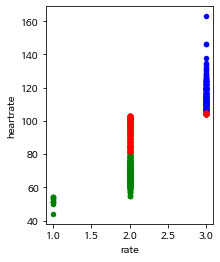

In [9]:

fig , ax =plt.subplots(figsize=(3,4))
df_temp=DF1[DF1['clustering']==1]
df_temp.plot.scatter(x='rate',y='heartrate',ax=ax,color='Green')
df_temp=DF1[DF1['clustering']==2]
df_temp.plot.scatter(x='rate',y='heartrate',ax=ax,color='Blue')
df_temp=DF1[DF1['clustering']==0]
df_temp.plot.scatter(x='rate',y='heartrate',ax=ax,color='Red')